<a href="https://colab.research.google.com/github/EazyyPeasyy/Pneumonia_KaggleDataset_Training/blob/main/Pneumonia_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando dado do Kaggle

In [ ]:
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download paultimothymooney/chest-xray-pneumonia
# !unzip -qq chest-xray-pneumonia.zip

# Pneumonia 

##Instalações e importes

In [23]:
!pip install --upgrade tensorflow
!pip install seaborn
!pip install xgboost

     |████████████████████████████████| 462 kB 27.1 MB/s 


In [3]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook
import seaborn as sns
sns.set_style("whitegrid")
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

## Representações

In [24]:
train_dir = '/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/train'
test_dir = '/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/test'
val_dir = '/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/val'

In [25]:
print("Train set:")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("\nTest set:")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("\nValidation set")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/PNEUMONIA"


Train set:
PNEUMONIA=3875
NORMAL=1341

Test set:
PNEUMONIA=390
NORMAL=234

Validation set
PNEUMONIA=8
NORMAL=8


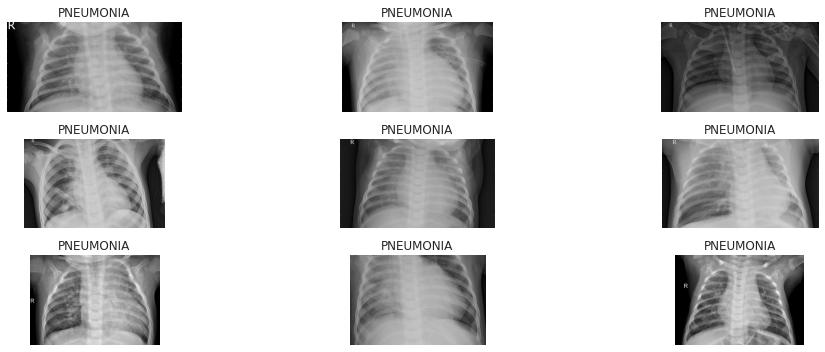

In [26]:
plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("PNEUMONIA")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

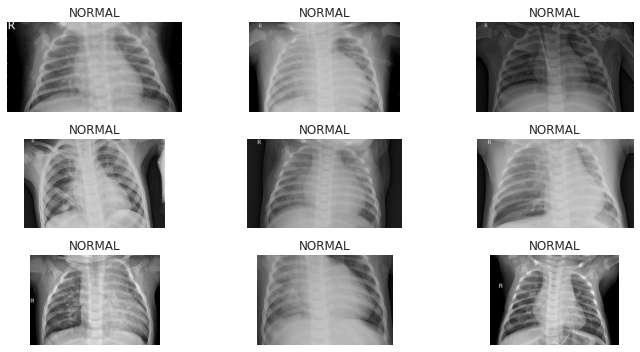

In [27]:
normal = os.listdir("/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/NORMAL")
normal_dir = "/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/NORMAL"

plt.figure(figsize=(10, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("NORMAL")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


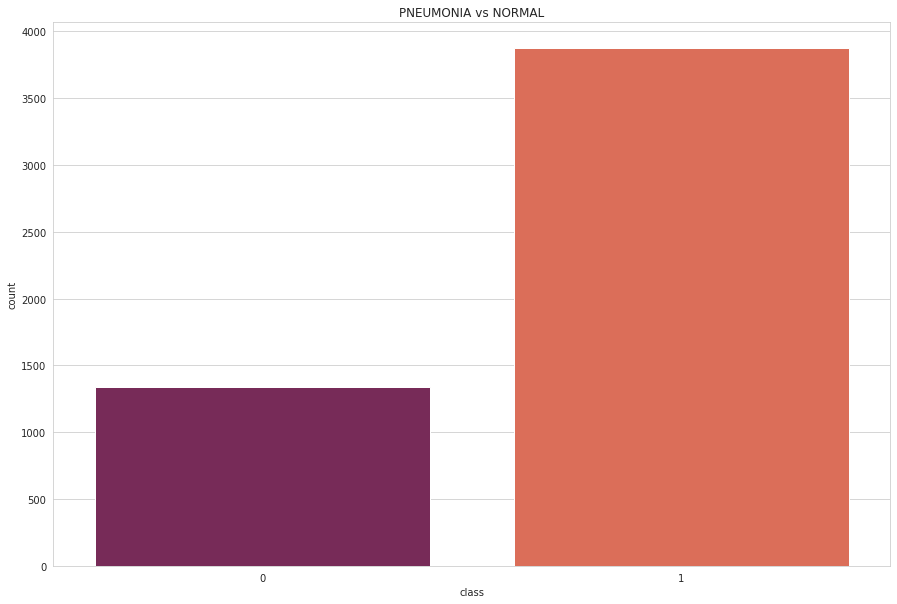

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data['class'],data=data, palette='rocket')
plt.title('PNEUMONIA vs NORMAL')
plt.show()

In [ ]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [ ]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=32,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )

validation = val_Datagen.flow_from_directory(val_dir,
                                              batch_size=2,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )

test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [40]:
percentege_test_size = 0.2
undersampling_size = 5215 # -1 para não fazer undersampling

# fig preprocessing
largura = 50
altura = 50
modo_de_cor = 'rgb' # rgb, grayscale, rgba
# fig preprocessing

# diretorio = '/mnt/Dados/Insync/sync_folder/Estudo/Aulas/Unifor/ciência de dados/classificacao imagens/animais-kaggle/'
# diretorio = '/mnt/Dados/Insync/sync_folder/Estudo/Aulas/Unifor/ciência de dados/classificacao imagens/dataset-documentos-full/'
# diretorio = '/mnt/Dados/Insync/sync_folder/Estudo/Aulas/Unifor/ciência de dados/classificacao imagens/pneumonia/'
# diretorio = '/mnt/Dados/Insync/sync_folder/Estudo/Aulas/Unifor/ciência de dados/classificacao imagens/gatos-patos-caes-rapozas-coelhos/treino/'
# diretorio = '/mnt/Dados/Insync/sync_folder/Estudo/Aulas/Unifor/ciência de dados/classificacao imagens/dataset-documentos/'
diretorio = r"/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/train"

In [39]:
targets = [x[0].replace(diretorio,'') for x in os.walk(diretorio)]

targets = targets[1:len(targets)] # exclui o primeiro da lista pq é o próprio diretório

dados = []

for classe in targets:
    imagens = os.listdir(diretorio+classe)
    i = 0
    for img in imagens:
        i+=1
        
        if (not '.txt' in img) and (not 'segmentation' in img) and (not 'desktop.ini' in img):
            dados.append([diretorio+classe+''+img,classe])
        
        if(i == undersampling_size and undersampling_size != -1):
            break

dados = np.array(dados)

            
df_dados = pd.DataFrame(dados,columns=['image','target'])

df_dados

,image,target
0,/content/drive/MyDrive/Pneumonia machine leran...,/NORMAL
1,/content/drive/MyDrive/Pneumonia machine leran...,/NORMAL
2,/content/drive/MyDrive/Pneumonia machine leran...,/NORMAL
3,/content/drive/MyDrive/Pneumonia machine leran...,/NORMAL
4,/content/drive/MyDrive/Pneumonia machine leran...,/NORMAL
...,...,...
5211,/content/drive/MyDrive/Pneumonia machine leran...,/PNEUMONIA
5212,/content/drive/MyDrive/Pneumonia machine leran...,/PNEUMONIA
5213,/content/drive/MyDrive/Pneumonia machine leran...,/PNEUMONIA
5214,/content/drive/MyDrive/Pneumonia machine leran...,/PNEUMONIA


In [42]:
def embedding(img_path,largura,altura,modo_de_cor):
    
    img = image.load_img(img_path, target_size=(largura, altura),color_mode= modo_de_cor)
    embed = image.img_to_array(img)
    
    shape_entrada = largura*altura*1

    if(modo_de_cor == 'rgb'):
        shape_entrada = largura*altura*3

    if(modo_de_cor == 'rgba'):
        shape_entrada = largura*altura*4
    
    return embed.reshape(shape_entrada)

In [43]:
target = df_dados['target'].array

array_features = []
for x in dados:
    array_features.append(embedding(x[0],largura,altura,modo_de_cor))

scaler = preprocessing.StandardScaler()

array_features = scaler.fit_transform(array_features)

df_features = pd.DataFrame(array_features)

df_features

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,1.325880,1.325880,1.325880,1.610795,1.610795,1.610795,1.448488,1.448488,1.448488,1.787458,...,2.047133,2.396416,2.396416,2.396416,1.446043,1.446043,1.446043,-0.360631,-0.360631,-0.360631
1,-0.369298,-0.369298,-0.369298,0.133973,0.133973,0.133973,0.446113,0.446113,0.446113,0.558114,...,0.041418,-0.755009,-0.755009,-0.755009,-0.613884,-0.613884,-0.613884,-0.527121,-0.527121,-0.527121
2,-0.939952,-0.939952,-0.939952,-1.096713,-1.096713,-1.096713,-1.040167,-1.040167,-1.040167,-0.433292,...,-0.997908,-0.755009,-0.755009,-0.755009,-0.613884,-0.613884,-0.613884,-0.527121,-0.527121,-0.527121
3,-0.939952,-0.939952,-0.939952,-1.096713,-1.096713,-1.096713,-1.230272,-1.230272,-1.230272,-1.444526,...,-0.049751,-0.755009,-0.755009,-0.755009,-0.613884,-0.613884,-0.613884,-0.527121,-0.527121,-0.527121
4,-0.939952,-0.939952,-0.939952,-1.096713,-1.096713,-1.096713,-1.230272,-1.230272,-1.230272,-1.444526,...,1.390717,-0.111408,-0.111408,-0.111408,-0.613884,-0.613884,-0.613884,-0.527121,-0.527121,-0.527121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,-0.167891,-0.167891,-0.167891,-0.217652,-0.217652,-0.217652,3.107592,3.107592,3.107592,-0.413463,...,-0.797336,-0.488692,-0.488692,-0.488692,-0.252005,-0.252005,-0.252005,-0.138645,-0.138645,-0.138645
5212,1.409799,1.409799,1.409799,1.610795,1.610795,1.610795,1.413924,1.413924,1.413924,1.906427,...,-0.596765,-0.755009,-0.755009,-0.755009,-0.613884,-0.613884,-0.613884,-0.527121,-0.527121,-0.527121
5213,-0.939952,-0.939952,-0.939952,-1.096713,-1.096713,-1.096713,-1.143861,-1.143861,-1.143861,-0.790198,...,-0.997908,-0.755009,-0.755009,-0.755009,-0.613884,-0.613884,-0.613884,-0.527121,-0.527121,-0.527121
5214,0.419547,0.419547,0.419547,0.221879,0.221879,0.221879,3.176721,3.176721,3.176721,-0.175526,...,-0.870271,-0.577464,-0.577464,-0.577464,-0.363352,-0.363352,-0.363352,-0.305135,-0.305135,-0.305135


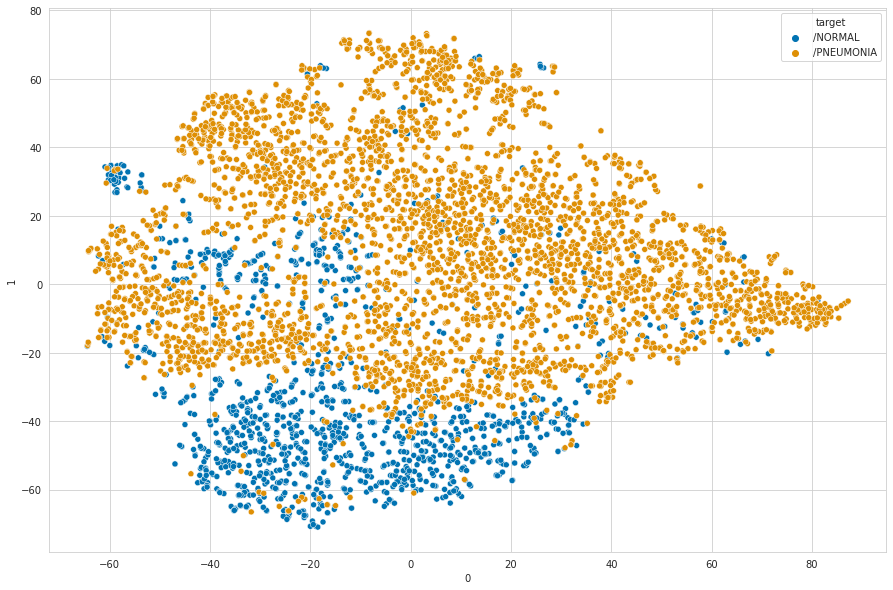

In [44]:
model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15)
array_red = model.fit_transform(df_features) 

df_tsne = pd.DataFrame(array_red)

df_tsne['target'] = target

plt.rcParams['figure.figsize'] = [15, 10]

sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], hue=df_tsne['target'], palette="colorblind")

plt.show()

In [45]:
def getModel():
    return RandomForestClassifier(n_jobs=20)
    # return LogisticRegression(n_jobs=20, solver='sag', multi_class='ovr')
    # return KNeighborsClassifier(n_neighbors=3,n_jobs=20)
    # return XGBClassifier()
    # return SGDClassifier(n_jobs=20,early_stopping=True,validation_fraction=0.05)

In [46]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_features.values,target,test_size=0.2)

model = getModel().fit(X_treino, y_treino)

score = model.score(X_teste, y_teste)

score

0.9348659003831418

In [47]:
scores = cross_val_score(getModel(),df_features.values,target,cv=10)

np.mean(scores)

0.9503401210463227

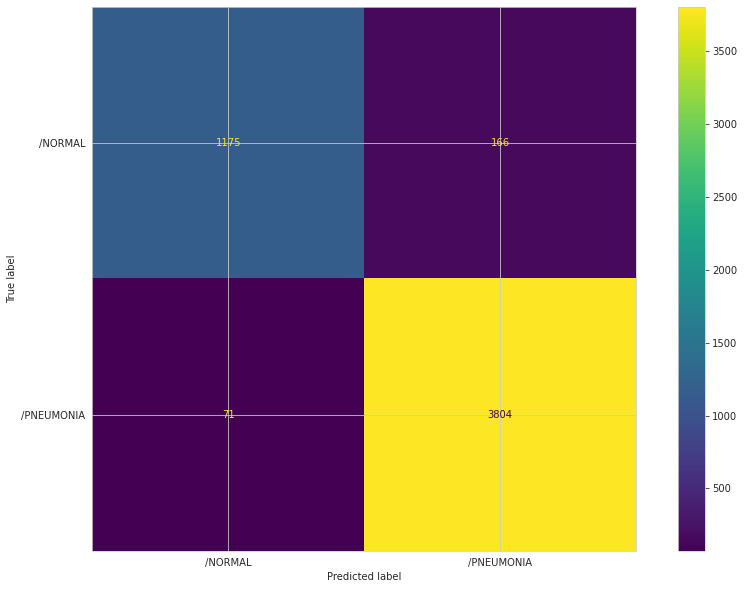

In [48]:
predicoes = cross_val_predict(getModel(),df_features.values,target,cv=10)

cm = confusion_matrix(target, predicoes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

# Av2

##Parâmetros

In [11]:
percentege_test_size = 0.2
undersampling_size = 1300 # -1 para não fazer undersampling
# fig preprocessing
largura = 50
altura = 50
modo_de_cor = 'rgb' # rgb, grayscale, rgba
# fig preprocessing
# diretorio = '/mnt/Dados/Insync/sync_folder/Estudo/Aulas/Unifor/ciência de dados/classificacao imagens/animais-kaggle/'
# diretorio = '/mnt/Dados/Insync/sync_folder/Estudo/Aulas/Unifor/ciência de dados/classificacao imagens/dataset-documentos-full/'
diretorio = r'/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/PNEUMONIA/*'

##Carregando Dataset

In [18]:
for x in os.walk(r'/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/PNEUMONIA/*'):
   a = x

print(a)

# targets = targets[1:len(targets)] # exclui o primeiro da lista pq é o próprio diretório

# dados = []

# for classe in targets:
#     imagens = os.listdir(diretorio+classe)
#     i = 0
#     for img in imagens:
#         i+=1
        
#         if (not '.txt' in img) and (not 'segmentation' in img) and (not 'desktop.ini' in img):
#             dados.append([diretorio+classe+'/'+img,classe])
        
#         if(i == undersampling_size and undersampling_size != -1):
#             break

# dados = np.array(dados)

# np.random.shuffle(dados)

# dados
            
# df_dados = pd.DataFrame(dados,columns=['image','target'])

# df_dados

1341


In [6]:
normal_cases_dir = '/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/NORMAL'
pneumonia_cases_dir = '/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/PNEUMONIA'

normal_cases = glob.glob('/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/NORMAL/*.jpeg')
pneumonia_cases = glob.glob('/content/drive/MyDrive/Pneumonia machine leraning/chest_xray/chest_xray/train/PNEUMONIA/*.jpeg')

train_data = []
a = 0
i = 0

for img in normal_cases:
    a+=1
    train_data.append((img, 'NORMAL'))
    if(i == undersampling_size and undersampling_size != -1):
      break

for img in pneumonia_cases:
    i+=1
    train_data.append((img, 'PNEUMONIA'))
    if(i == undersampling_size and undersampling_size != -1):
      break


train_data = np.array(train_data)

np.random.shuffle(train_data)

train_data = pd.DataFrame(train_data, columns=['image', 'target'])

train_data

,image,target
0,/content/drive/MyDrive/Pneumonia machine leran...,PNEUMONIA
1,/content/drive/MyDrive/Pneumonia machine leran...,PNEUMONIA
2,/content/drive/MyDrive/Pneumonia machine leran...,PNEUMONIA
3,/content/drive/MyDrive/Pneumonia machine leran...,NORMAL
4,/content/drive/MyDrive/Pneumonia machine leran...,NORMAL
...,...,...
2636,/content/drive/MyDrive/Pneumonia machine leran...,PNEUMONIA
2637,/content/drive/MyDrive/Pneumonia machine leran...,PNEUMONIA
2638,/content/drive/MyDrive/Pneumonia machine leran...,PNEUMONIA
2639,/content/drive/MyDrive/Pneumonia machine leran...,NORMAL


In [6]:
def embedding(img_path,largura,altura,modo_de_cor):
    
    img = image.load_img(img_path, target_size=(largura, altura),color_mode= modo_de_cor)
    embed = image.img_to_array(img)
    
    shape_entrada = largura*altura*1

    if(modo_de_cor == 'rgb'):
        shape_entrada = largura*altura*3

    if(modo_de_cor == 'rgba'):
        shape_entrada = largura*altura*4
    
    return embed.reshape(shape_entrada)

In [8]:
target = train_data['target'].array

array_features = []
for x in train_data:
    array_features.append(embedding(x[0], largura, altura, modo_de_cor))

scaler = preprocessing.StandardScaler()

array_features = scaler.fit_transform(array_features)

df_features = pd.DataFrame(array_features)

df_features

FileNotFoundError: ignored